# Explore here

In [4]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv')

df

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


In [5]:
for column in df.columns:
    if df[column].dtype == 'object':
        df[column+'_num'] = pd.factorize(df[column])[0]

In [6]:
df2 = df.drop(['COUNTY_NAME','STATE_NAME'], axis = 1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [7]:
df2.drop_duplicates(inplace=True)

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to STATE_NAME_num
dtypes: float64(61), int64(47)
memory usage: 2.6 MB


In [9]:
df2['diabetes_prevalence'].describe()

count    3140.000000
mean       13.073503
std         2.724351
min         6.100000
25%        11.200000
50%        12.800000
75%        14.800000
max        25.600000
Name: diabetes_prevalence, dtype: float64

In [10]:
for column in df2.columns:
    nulos = df2[column].isnull().sum()
    if nulos > 0:
        print(column)

In [11]:
for column in df2.columns:
    if 'diabetes' in column:
        if column != 'diabetes_prevalence':
            print(column)
            df2.drop(column,axis=1,inplace=True)

diabetes_Lower 95% CI
diabetes_Upper 95% CI
diabetes_number


In [12]:
df = df[['Percent of adults with a high school diploma only 2014-18','Percent of Population Aged 60+','Heart disease_Upper 95% CI','diabetes_prevalence']]
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Percent of adults with a high school diploma only 2014-18  3140 non-null   float64
 1   Percent of Population Aged 60+                             3140 non-null   float64
 2   Heart disease_Upper 95% CI                                 3140 non-null   float64
 3   diabetes_prevalence                                        3140 non-null   float64
dtypes: float64(4)
memory usage: 98.2 KB


,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI,diabetes_prevalence
0,32.6,19.1,8.7,12.9
1,27.6,26.3,8.7,12.0
2,35.7,23.5,11.8,19.7
3,47.3,21.1,9.3,14.1
4,34.0,23.6,10.1,13.5


In [15]:
df[['Percent of adults with a high school diploma only 2014-18','Percent of Population Aged 60+','Heart disease_Upper 95% CI','diabetes_prevalence']].describe()

,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI,diabetes_prevalence
count,3140.000000,3140.000000,3140.000000,3140.000000
mean,34.285669,24.736943,9.454395,13.073503
std,7.193125,5.564871,1.920387,2.724351
min,5.500000,5.800000,3.700000,6.100000
25%,29.800000,21.200000,8.200000,11.200000
50%,34.600000,24.400000,9.400000,12.800000
75%,39.300000,27.800000,10.700000,14.800000
max,55.600000,64.200000,16.400000,25.600000


/tmp/ipykernel_729/2442453737.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)
/tmp/ipykernel_729/2442453737.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Percent_of_Population_Aged_60.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)
/tmp/ipykernel_729/2442453737.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  Gráfico_Heart_disease_Upper_95_CI.set_xticklabels(axis[1,0].get_xticklabels(), rotation=90)


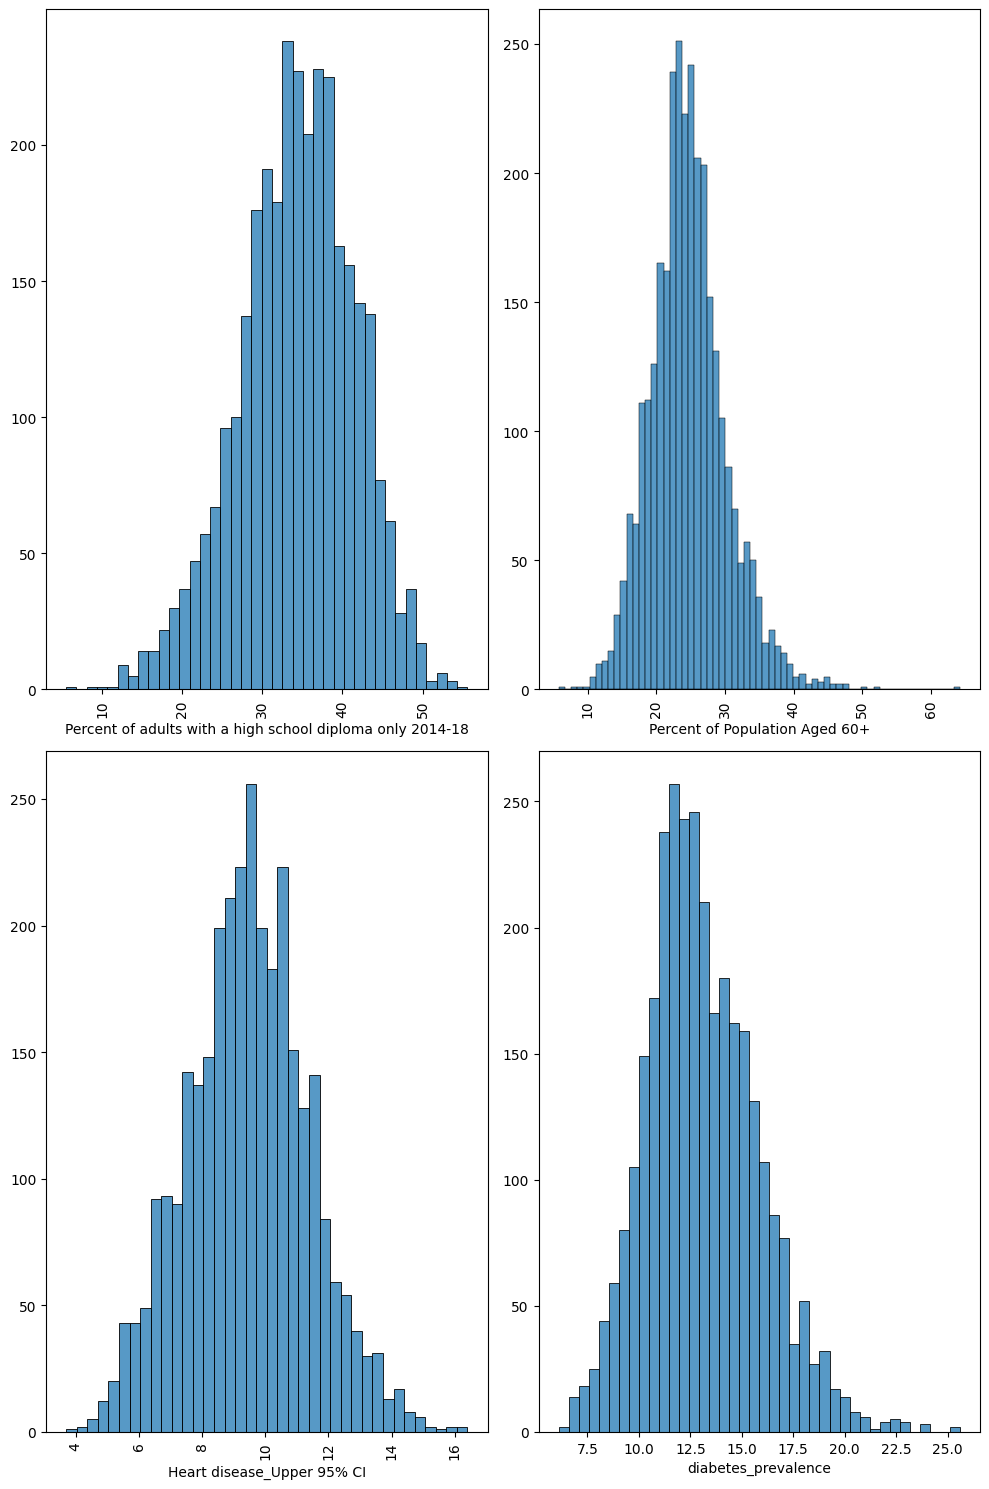

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 2, figsize = (10, 15))

Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18 = sns.histplot(ax=axis[0,0],data=df, x='Percent of adults with a high school diploma only 2014-18')
Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18.set_ylabel('')
Gráfico_Percent_of_adults_with_a_high_school_diploma_only_2014_18.set_xticklabels(axis[0,0].get_xticklabels(), rotation=90)

Gráfico_Percent_of_Population_Aged_60= sns.histplot(ax=axis[0,1],data=df, x='Percent of Population Aged 60+')
Gráfico_Percent_of_Population_Aged_60.set_ylabel('')
Gráfico_Percent_of_Population_Aged_60.set_xticklabels(axis[0,1].get_xticklabels(), rotation=90)

Gráfico_Heart_disease_Upper_95_CI= sns.histplot(ax=axis[1,0],data=df, x='Heart disease_Upper 95% CI')
Gráfico_Heart_disease_Upper_95_CI.set_ylabel('')
Gráfico_Heart_disease_Upper_95_CI.set_xticklabels(axis[1,0].get_xticklabels(), rotation=90)

diabetes_prevalence=sns.histplot(ax=axis[1,1],data=df, x='diabetes_prevalence')
diabetes_prevalence.set_ylabel('')

plt.tight_layout()
plt.show()

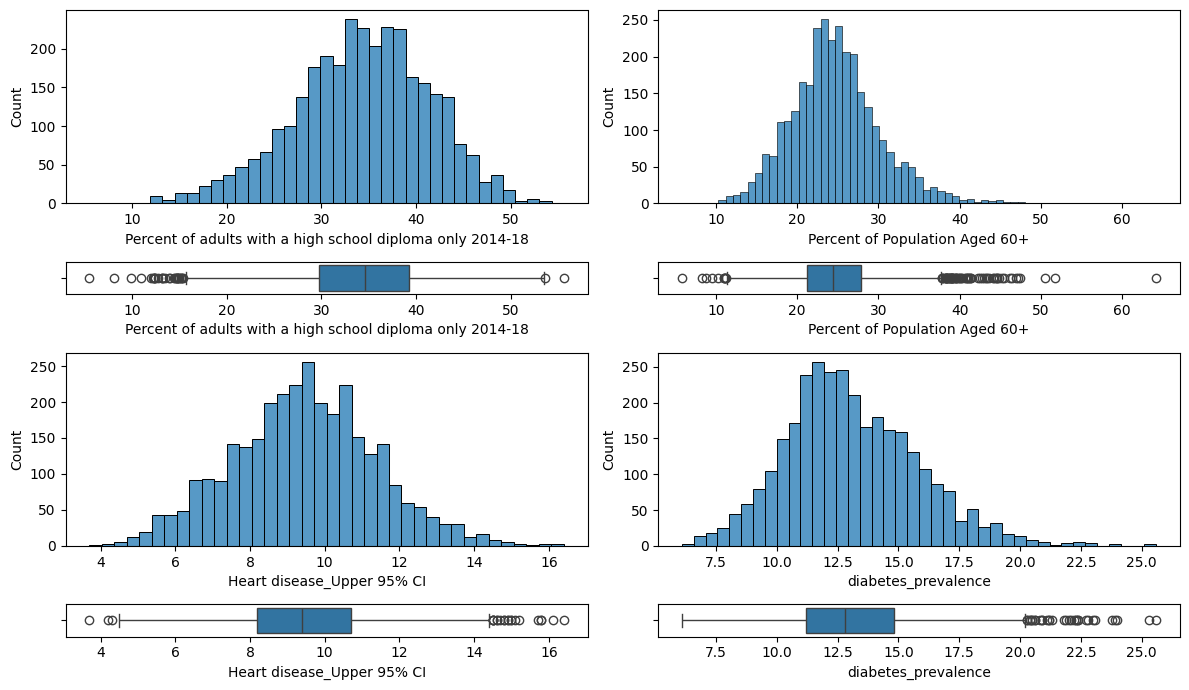

In [20]:
fig, axis = plt.subplots(4, 2, figsize = (12, 7), gridspec_kw={'height_ratios': [6, 1,6,1]})

sns.histplot(ax=axis[0,0],data=df,x='Percent of adults with a high school diploma only 2014-18')
sns.boxplot(ax=axis[1,0],data=df,x='Percent of adults with a high school diploma only 2014-18')

sns.histplot(ax=axis[0,1],data=df,x='Percent of Population Aged 60+')
sns.boxplot(ax=axis[1,1],data=df,x='Percent of Population Aged 60+')

sns.histplot(ax=axis[2,0],data=df,x='Heart disease_Upper 95% CI')
sns.boxplot(ax=axis[3,0],data=df,x='Heart disease_Upper 95% CI')

sns.histplot(ax=axis[2,1],data=df,x='diabetes_prevalence')
sns.boxplot(ax=axis[3,1],data=df,x='diabetes_prevalence')

plt.tight_layout()
plt.show()

/tmp/ipykernel_729/3922180573.py:12: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


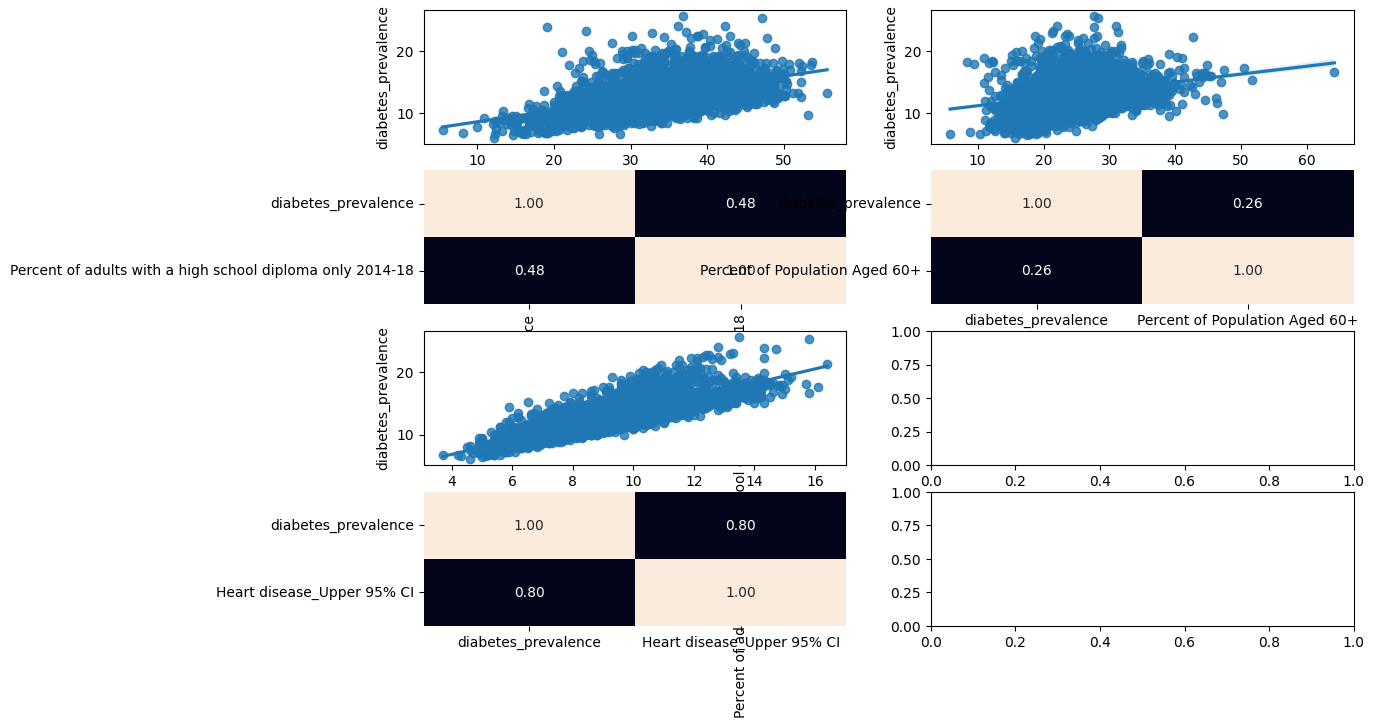

In [23]:
fig, axis = plt.subplots(4, 2, figsize = (12,8))

sns.regplot(ax = axis[0,0], data=df,x='Percent of adults with a high school diploma only 2014-18', y='diabetes_prevalence')
sns.heatmap(df[['diabetes_prevalence','Percent of adults with a high school diploma only 2014-18']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df,x='Percent of Population Aged 60+', y='diabetes_prevalence')
sns.heatmap(df[['diabetes_prevalence','Percent of Population Aged 60+']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[2,0], data=df,x='Heart disease_Upper 95% CI', y='diabetes_prevalence')
sns.heatmap(df[['diabetes_prevalence','Heart disease_Upper 95% CI']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

plt.tight_layout()
plt.show()

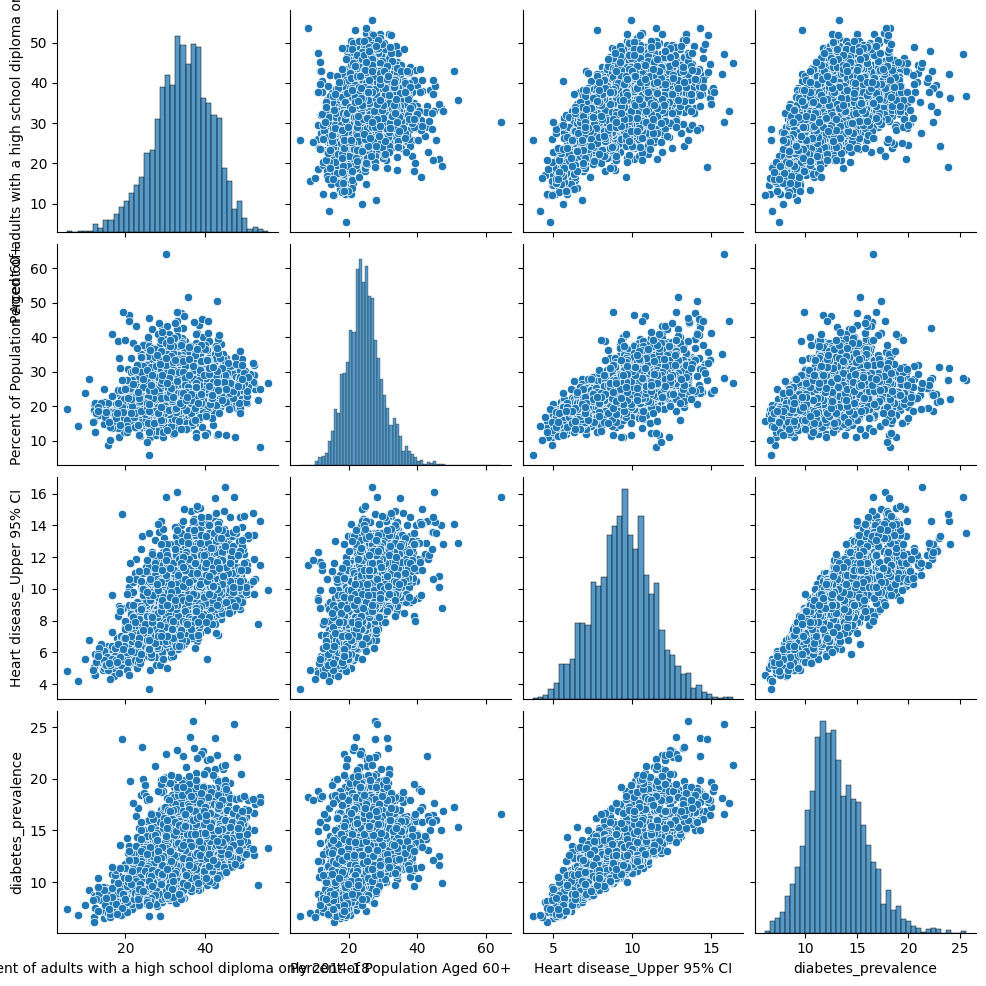

In [24]:
sns.pairplot(data=df)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(['diabetes_prevalence'],axis=1)
y = df['diabetes_prevalence']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

X_train

,Percent of adults with a high school diploma only 2014-18,Percent of Population Aged 60+,Heart disease_Upper 95% CI
1292,35.4,27.4,11.1
2302,48.4,28.8,10.1
761,43.8,21.5,8.1
2194,32.8,21.6,8.5
1241,36.4,23.2,9.1
...,...,...,...
3092,32.6,19.6,6.4
1095,30.5,16.1,7.6
1130,39.8,20.6,10.9
1294,40.7,44.6,14.5


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train,y_train)
xtrain_escalados = scaler.transform(X_train)
xtest_escalados = scaler.transform(X_test)

X_train_esc = pd.DataFrame(xtrain_escalados,index=X_train.index,columns=X_train.columns)
X_test_esc = pd.DataFrame(xtest_escalados,index=X_test.index,columns=X_test.columns)

In [28]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

model_rl = LinearRegression()
model_lasso = Lasso()
model_ridge = Ridge()

model_rl.fit(X_train_esc,y_train)
model_lasso.fit(X_train_esc,y_train)
model_ridge.fit(X_train_esc,y_train)

Ridge()

In [29]:
y_pred_rl = model_rl.predict(X_test_esc)
y_pred_lasso = model_lasso.predict(X_test_esc)
y_pred_ridge = model_ridge.predict(X_test_esc)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"El error de la Regresion Lineal es {mean_squared_error(y_test,y_pred_rl)} y el R2 es de {r2_score(y_test,y_pred_rl)}")
print(f"El error de la Regresion Lasso es {mean_squared_error(y_test,y_pred_lasso)} y el R2 es de {r2_score(y_test,y_pred_lasso)}")
print(f"El error de la Regresion Ridge es {mean_squared_error(y_test,y_pred_ridge)} y el R2 es de {r2_score(y_test,y_pred_ridge)}")

El error de la Regresion Lineal es 1.9631848708519364 y el R2 es de 0.7559184655195171
El error de la Regresion Lasso es 4.03514225308474 y el R2 es de 0.4983133134310722
El error de la Regresion Ridge es 1.963686129768006 y el R2 es de 0.7558561443152216


In [31]:
y_pred_rl_train = model_rl.predict(X_train_esc)
print(f"El error de la Regresion Lineal es {mean_squared_error(y_train,y_pred_rl_train)} y el R2 es de {r2_score(y_train,y_pred_rl_train)}")

El error de la Regresion Lineal es 1.8444587846742104 y el R2 es de 0.7459000213765677


In [32]:
import numpy as np
var_x = np.linspace(0,20,100)
var_x

array([ 0.        ,  0.2020202 ,  0.4040404 ,  0.60606061,  0.80808081,
        1.01010101,  1.21212121,  1.41414141,  1.61616162,  1.81818182,
        2.02020202,  2.22222222,  2.42424242,  2.62626263,  2.82828283,
        3.03030303,  3.23232323,  3.43434343,  3.63636364,  3.83838384,
        4.04040404,  4.24242424,  4.44444444,  4.64646465,  4.84848485,
        5.05050505,  5.25252525,  5.45454545,  5.65656566,  5.85858586,
        6.06060606,  6.26262626,  6.46464646,  6.66666667,  6.86868687,
        7.07070707,  7.27272727,  7.47474747,  7.67676768,  7.87878788,
        8.08080808,  8.28282828,  8.48484848,  8.68686869,  8.88888889,
        9.09090909,  9.29292929,  9.49494949,  9.6969697 ,  9.8989899 ,
       10.1010101 , 10.3030303 , 10.50505051, 10.70707071, 10.90909091,
       11.11111111, 11.31313131, 11.51515152, 11.71717172, 11.91919192,
       12.12121212, 12.32323232, 12.52525253, 12.72727273, 12.92929293,
       13.13131313, 13.33333333, 13.53535354, 13.73737374, 13.93

In [33]:
r2_alphas = []
for alpha in var_x:
    model = Lasso(alpha=alpha)
    model.fit(X_train_esc,y_train)
    y_pred = model.predict(X_test_esc)
    r2_alphas.append(r2_score(y_test,y_pred))
r2_alphas

/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py:1389: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.317e+03, tolerance: 1.823e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

[0.7559184655195171,
 0.7142612718384862,
 0.6165958921271302,
 0.5869598853685256,
 0.5465958964254191,
 0.49550392529780984,
 0.4336839719856984,
 0.361136036489085,
 0.2778601188079689,
 0.1838562189423507,
 0.07912433689223008,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.0031556485192774097,
 -0.00315564851927

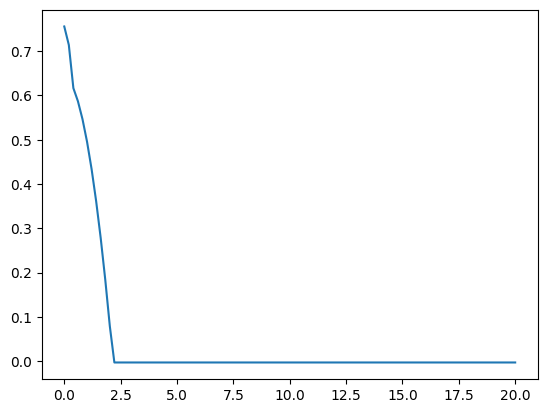

In [34]:
import matplotlib.pyplot as plt

plt.plot(var_x,r2_alphas)
plt.show()